https://github.com/IgnacioPardo/Tecnologias_Exponenciales_2023/blob/main/Consigna_NN.md
https://github.com/IgnacioPardo/SNN/tree/main

# Trabajo Práctico Redes Neuronales

## Introducción

El objetivo de este trabajo es plantear una red neuronal con una capa de entrada con $n$ neuronas y una capa de salida con $m$ salidas para resolver un problema de su propía creación.

Se evaluara la correcta implementación de la red neuronal y la explicación de los elementos de la teoría vistos en clase.

## Consigna

A partir del siguiente Notebook visto en clase [SNN](https://github.com/IgnacioPardo/SNN/blob/main/SNN.ipynb), se pide:

1. Plantear un problema a resolver con una red neuronal de una capa de entrada y una capa de salida. Las salidas no deben ser excluyentes, es decir, pueden pertenecer a mas de una clase. Algunos ejemplos son: A partir de caracteristicas de una vivienda, determinar si la vivienda es de algun estilo (moderna, agradable, tradicional). Pueden generar ustedes un pequeño dataset para utilizar o buscar en Kaggle.
2. Modificar la estructura de la red neuronal para que admita $n$ neuronas de entrada y $m$ neuronas de salida.

Ademas deben indicar los elementos de la teoría que vimos en clase que identifiquen en el código y explicarlos (Estructura de la Red, Función de activación, Forward propagation, Back propagation y Gradiente descendente).

## Bonus

A. ¿Como modificarían la estructura de la red para que admita $k$ capas ocultas con $n$ neuronas cada una? Describir como sería el algoritmo de forward propagation en este caso, no es necesario implementar el algoritmo de back propagation.

B. Investigar la función de activación Softmax y explicar como se puede utilizar para resolver un problema de clasificación con $m$ clases mutualmente excluyentes. ¿Que habría que modificar en el código para utilizar esta función de activación?

## Entrega

La entrega consiste en un notebook de Jupyter con el código y las explicaciones correspondientes. La fecha de entrega es el 29/10/2023 a través del siguiente [Google Forms]().

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [5]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
df = pd.read_csv("seattle-weather.csv")
weather_tof = pd.get_dummies(df['weather'])
df = pd.concat([df, weather_tof], axis=1)
df = df.drop(columns=['date', 'weather'])
df

,precipitation,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun
0,0.0,12.8,5.0,4.7,True,False,False,False,False
1,10.9,10.6,2.8,4.5,False,False,True,False,False
2,0.8,11.7,7.2,2.3,False,False,True,False,False
3,20.3,12.2,5.6,4.7,False,False,True,False,False
4,1.3,8.9,2.8,6.1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,False,False,True,False,False
1457,1.5,5.0,1.7,1.3,False,False,True,False,False
1458,0.0,7.2,0.6,2.6,False,True,False,False,False
1459,0.0,5.6,-1.0,3.4,False,False,False,False,True


In [40]:
df_train = df.iloc[0:5].to_numpy()
df_test = df.iloc[5:]
df_test

,precipitation,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun
5,2.5,4.4,2.2,2.2,False,False,True,False,False
6,0.0,7.2,2.8,2.3,False,False,True,False,False
7,0.0,10.0,2.8,2.0,False,False,False,False,True
8,4.3,9.4,5.0,3.4,False,False,True,False,False
9,1.0,6.1,0.6,3.4,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,False,False,True,False,False
1457,1.5,5.0,1.7,1.3,False,False,True,False,False
1458,0.0,7.2,0.6,2.6,False,True,False,False,False
1459,0.0,5.6,-1.0,3.4,False,False,False,False,True


In [8]:
#usar las columnas de wind	drizzle	fog	rain	snow	sun como salida 
training_outputs = df[['wind', 'drizzle', 'fog', 'rain', 'snow', 'sun']].to_numpy()
training_inputs = df[['precipitation',	'temp_max',	'temp_min']].to_numpy()
training_inputs
training_outputs



array([[4.7, True, False, False, False, False],
       [4.5, False, False, True, False, False],
       [2.3, False, False, True, False, False],
       ...,
       [2.6, False, True, False, False, False],
       [3.4, False, False, False, False, True],
       [3.5, False, False, False, False, True]], dtype=object)

Separar los synaptic wights

In [13]:
#hacer los sinaptic weights
n = training_inputs.shape[1]
synaptic_weights = 2 + np.random.random((3, 6)) - 1
w = synaptic_weights
x = training_inputs
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

w = w.astype('float64')



probar los W tras varias iteraciones 

In [14]:
for iteration in range(50000):

    # Arranca con los valores de training
    input_layer = x

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, w)

    # Calculo el error
    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    adjustments = error * sigmoid_derivative(outputs)
    w += np.dot(input_layer.T, adjustments).astype('float64')    

C:\Users\usuario\AppData\Local\Temp\ipykernel_36712\2797513374.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-x) )


In [15]:
print('Synaptic weights after training')
print(w)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[ 2.84658586e+00 -3.57356324e+00 -9.63742734e-01  1.70016508e+00
  -1.32766200e-02 -1.59233604e+01]
 [ 1.66550310e+01 -1.74583469e+01 -8.16409614e+00 -2.91140988e+01
  -4.79933725e+01  8.92101093e+01]
 [-9.86762169e+00  5.91931230e+00  6.07163779e+00  3.99943928e+00
  -5.12262049e+00  4.25273920e+01]]
Outputs after training: 
[[1.00000000e+000 6.35626472e-085 6.31587553e-033 6.92282753e-154
  1.20971618e-278 1.00000000e+000]
 [1.00000000e+000 8.15794716e-091 1.72780040e-035 7.66110497e-122
  5.88025703e-228 1.00000000e+000]
 [1.00000000e+000 3.60979073e-072 1.46863024e-023 1.44789489e-135
  1.29198198e-260 1.00000000e+000]
 ...
 [1.00000000e+000 8.94487489e-054 1.13148699e-024 1.01086676e-090
  3.92387639e-152 1.00000000e+000]
 [1.00000000e+000 9.32648783e-046 3.21838911e-023 2.85856606e-073
  3.18044248e-115 1.00000000e+000]
 [1.00000000e+000 1.38650593e-048 4.04642863e-026 3.51173139e-075
  8.90606655e-113 1.00000000e+000]]


In [16]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

evaluar la 

In [44]:
a = 1 #@param {type:"integer"}
c = 3 #@param {type:"integer"}
b = 4 #@param {type:"integer"}

input_layer = np.array(training_inputs)
res = sigmoid(np.dot(input_layer, w))[0]
display(res)

thresh = 0.01
out = 0 if np.all(res < thresh) else 1
large(out)

C:\Users\usuario\AppData\Local\Temp\ipykernel_36712\2797513374.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-x) )


array([1.00000000e+000, 6.35634782e-085, 6.31587553e-033, 6.92290843e-154,
       1.20971618e-278, 1.00000000e+000])

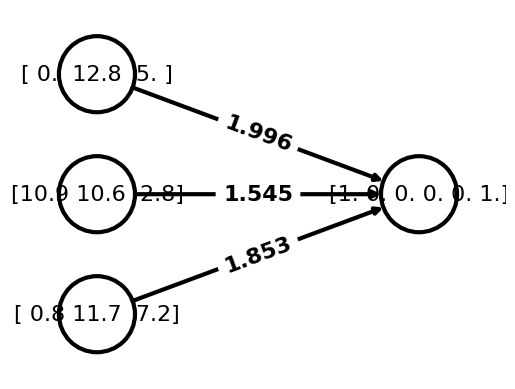

In [53]:
G = nx.DiGraph()
layers = [[0, 1, 2], [3]]

rels = list(itertools.product(*layers))
flatten = lambda l: [x for i in l for x in i]

labels = {i: v for i, v in enumerate(input_layer) if i in flatten(rels)}
labels[3] = np.round(res, 3)

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
  for j, v in enumerate(l):
    pos[v] = (i, len(l) - j)

pos[3] = (pos[3][0], pos[1][1])

weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][0]) for i, (ra, rb) in enumerate(rels)}

node_colors = [(1, 1, 1, 1) for _ in range(len(G.nodes()))]
options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": node_colors,
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}
G.add_edges_from(rels)
for node in G.nodes():
    if node not in pos:
        pos[node] = (0, 0)
for node in flatten(rels):
    if node not in pos:
        pos[node] = (0, 0)

G.add_nodes_from(flatten(rels))

nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16, 
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()

In [54]:
error = np.mean(np.square(training_outputs - outputs))
error

1.3695493955214066

In [55]:
predictions = np.array(df_test[['precipitation',	'temp_max',	'temp_min']])
predictions

array([[ 2.5,  4.4,  2.2],
       [ 0. ,  7.2,  2.8],
       [ 0. , 10. ,  2.8],
       ...,
       [ 0. ,  7.2,  0.6],
       [ 0. ,  5.6, -1. ],
       [ 0. ,  5.6, -2.1]])

In [42]:
#evaluer modelo 
eval_NN(predictions, w) 

C:\Users\usuario\AppData\Local\Temp\ipykernel_36712\2797513374.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-x) )


array([[1.00000000e+000, 2.59756776e-032, 1.42569483e-011,
        1.07939317e-050, 2.40357815e-097, 1.00000000e+000],
       [1.00000000e+000, 4.04734520e-048, 7.15785496e-019,
        6.69808493e-087, 5.00401423e-157, 1.00000000e+000],
       [1.00000000e+000, 2.38446973e-069, 8.45359744e-029,
        2.64540256e-122, 2.17870989e-215, 1.00000000e+000],
       ...,
       [1.00000000e+000, 8.94490993e-054, 1.13148699e-024,
        1.01086917e-090, 3.92387639e-152, 1.00000000e+000],
       [1.00000000e+000, 9.32649499e-046, 3.21838911e-023,
        2.85856340e-073, 3.18044248e-115, 1.00000000e+000],
       [1.00000000e+000, 1.38650463e-048, 4.04642863e-026,
        3.51172080e-075, 8.90606655e-113, 1.00000000e+000]])